# Performing a t-Test

## 1. Do homes with air conditioning have higher sales price than homes without air conditioning?

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from scipy import stats
import math


# Read from the online csv to a pandas dataframe
homes = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/homeprices.applied.econ.csv')

In [6]:
# Explore the dataset
homes.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


In [7]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [26]:
# Split the dataset into homes with AC and homes w/out AC
ac_homes = homes[homes['airco'] == 'yes']
no_ac_homes = homes[homes['airco'] == 'no']
print('ac_homes amount', ac_homes.shape[0])
print('no_ac_homes amount', no_ac_homes.shape[0])

ac_homes amount 173
no_ac_homes amount 373


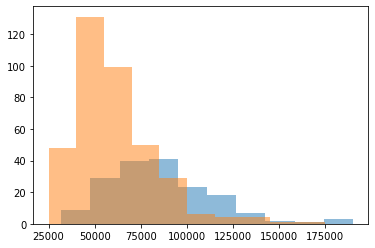

In [28]:
# Explore distribution of each of those samples
plt.hist(ac_homes['price'], alpha = .5)
plt.hist(no_ac_homes['price'], alpha = .5)
plt.show()

In [32]:
# Check the stats description to see kurtosis and skewness of each
print(stats.describe(ac_homes.price))
print(stats.describe(no_ac_homes.price))
print('The skewness and kurtosis of no_ac_homes do not contribute to a normal distribution, but we are gonna keep moving on anyway I guess.')

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)
The skewness and kurtosis of no_ac_homes do not contribute to a normal distribution, but we are gonna keep moving on anyway I guess.


No: The means are the same

Na: The means are not equal to each other

alpha = .05

confidence = 95%

In [34]:
# Perform a t-test between the two samples
stats.ttest_ind(ac_homes.price, no_ac_homes.price)

Ttest_indResult(statistic=11.862852780650169, pvalue=4.972721571759431e-29)

The test statistic is greater than 1.96

The p-value is < .05

There is less than a 5% chance that we could get a difference in means as extreme as this, assuming the null hypothesis is true. 

P < .05, so we will reject the null hypothesis.

In [38]:
# Calculate the confidence interval
def get_95_ci(array_1, array_2):
    n_1 = array_1.shape[0]
    n_2 = array_2.shape[0]
    mean_1 = array_1.mean()
    mean_2 = array_2.mean()
    var_1 = array_1.var()
    var_2 = array_2.var()
    mean_diff = mean_2 - mean_1
    std_err_diff = math.sqrt((var_1 / n_1) + (var_2 / n_2))
    margin_of_error = 1.96 * std_err_diff
    ci_lower = mean_diff - margin_of_error
    ci_upper = mean_diff + margin_of_error
    return 'The difference in means at the 95 percent confidence interval (two-tail) is between {} and {}'.format(ci_lower, ci_upper)

get_95_ci(ac_homes.price, no_ac_homes.price)

'The difference in means at the 95 percent confidence interval (two-tail) is between -30758.09492994282 and -21233.379166974857'

In [39]:
import seaborn as sns

[[Text(0, 0, 'ac_homes'), Text(0, 0, 'no_ac_homes')]]

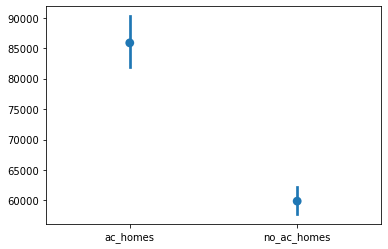

In [42]:
q = sns.pointplot(data = [ac_homes.price, no_ac_homes.price], join=False)
q.set(xticklabels = ['ac_homes', 'no_ac_homes'])

## 2. Do homes with a full basement have a higher sales price than homes without a full basement?

In [45]:
# Separate each sample
base_homes = homes[homes.fullbase == 'yes']
no_base_homes = homes[homes.fullbase == 'no']
print('base_homes amount', base_homes.shape[0])
print('no_base_homes amount', no_base_homes.shape[0])

base_homes amount 191
no_base_homes amount 355


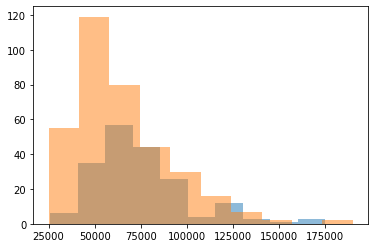

In [48]:
# Explore distribution of each visually
plt.hist(base_homes.price, alpha=.5)
plt.hist(no_base_homes.price, alpha=.5)
plt.show()

In [51]:
# Explore statistical descriptions of each sample
print(stats.describe(base_homes.price))
print(stats.describe(no_base_homes.price))
print('Both of these samples\' skewness and kurtosis fall within conventially acceptable ranges')

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)
Both of these samples' skewness and kurtosis fall within conventially acceptable ranges


In [52]:
# Perform a t-test on the samples
stats.ttest_ind(base_homes.price, no_base_homes.price)

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

The statistic is greater than 1.96 and the p-value is much less than .05

Since the hypothesis were:

Ho: means are the same

Ha: means aren't the same

We will reject the null hypothesis that the means are the same.

In [53]:
# Display the confidence interval
get_95_ci(base_homes.price, no_base_homes.price)

'The difference in means at the 95 percent confidence interval (two-tail) is between -15032.294775656886 and -5801.544262762097'

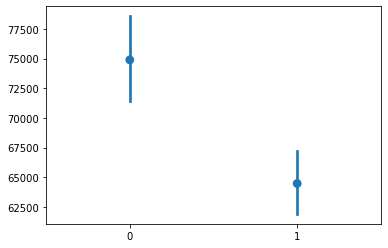

In [56]:
#Show the visual difference between the means
q = sns.pointplot(data = [base_homes.price, no_base_homes.price], join=False)

# All Done!